## News Sentiments

### OBSERVATIONS:
On 11/26/17  15:45 sentiment analysis was completed on most recent 100 tweets by BBC, CNN, CBS, FOX, and NYT.

1. Overall, between all five news outlets there is a greater density of neutral to positively rated tweets/headlines regarding news coverage.

2. Based on average compound scores, CBS and FOX tweet with more positivly perceived headline tweets. CNN tweets with most negative setiments, followed by New York Times. 

3. In a quick scan of headlines tweeted by each media outlet, CNN seems to print less pop-culture/ random factoids as compared to CBS and FOX, as well as BBC which seems to cover world news as well as "tidbits of interest". For a staight forward and bleak view of the world, follow CNN. 




In [2]:
# Dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from datetime import datetime

from matplotlib.font_manager import FontProperties
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
target_user =("@BBC", "@CNN", "@CBS","@FoxNews", "@nytimes")

counter = 100

sentiments = pd.DataFrame(columns = ["Name","Tweet Count","Tweet","Compound Score", "Positive","Negative","Neutral","Date"])  #Empty Dataframe
                          
for target in target_user:
    #print(f"Tweets for {target}.")
    counter = 100
    for x in range(5):
        response = api.user_timeline(target, page=x)
    
        for tweet in range(20):
       
        # Get all tweets from home feed
           # public_tweets = api.user_timeline(target, page=x)
            tweets =response[tweet]["text"]
            name = response[tweet]["user"]["name"]
            date=response[tweet]["created_at"]
            #print(f"Tweet{counter}: {tweets}")
        #print(json.dumps(public_tweets, sort_keys=True, indent=4))
            results = analyzer.polarity_scores(tweets)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            sentiments=sentiments.append({"Name":name, "Tweet":tweets, "Tweet Count": counter,
                                          "Compound Score": compound,"Positive":pos,
                                          "Negative":neg,"Neutral":neu,"Date":date}, ignore_index=True)              
           
            
            #print(f"tweet{counter}: {name}:{tweets} : {compound}")
            counter -=1
 




In [4]:
sentiments

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
0,BBC,100,RT @BBCTwo: Flipping AMAZING. 😲 #RobotWars htt...,0.7028,0.491,0.000,0.509,Sun Nov 26 21:12:48 +0000 2017
1,BBC,99,"RT @bbcstrictly: We're not crying, you are 😢 @...",0.3724,0.203,0.000,0.797,Sun Nov 26 21:11:53 +0000 2017
2,BBC,98,"RT @bbcstrictly: ""This has been the best exper...",0.8442,0.288,0.000,0.712,Sun Nov 26 21:11:45 +0000 2017
3,BBC,97,RT @CBeebiesHQ: Congratulations to @HEYDUGGEE!...,0.8070,0.342,0.000,0.658,Sun Nov 26 21:11:33 +0000 2017
4,BBC,96,RT @BBCOne: One word: magnificent. #BluePlanet...,0.5994,0.394,0.000,0.606,Sun Nov 26 20:51:01 +0000 2017
5,BBC,95,RT @BBCOne: 🎤 “I’m coming out. I want the worl...,0.0772,0.075,0.000,0.925,Sun Nov 26 20:48:58 +0000 2017
6,BBC,94,'You can't mug off the Queen'. 😂 ⚒ 🎖 @MrDDyer ...,0.2023,0.107,0.000,0.893,Sun Nov 26 20:35:06 +0000 2017
7,BBC,93,RT @BBCOne: Sea otters: providing 100% of your...,0.5106,0.191,0.000,0.809,Sun Nov 26 20:20:17 +0000 2017
8,BBC,92,RT @BBCOne: Raiding the fridge in the middle o...,0.0000,0.000,0.000,1.000,Sun Nov 26 20:13:59 +0000 2017
9,BBC,91,"Tonight, a team of scientists begin an expedit...",-0.5256,0.000,0.175,0.825,Sun Nov 26 20:03:04 +0000 2017


In [5]:
sentiments.to_csv("walsh_distingushing_sentiments.csv")

In [21]:
BBC = sentiments.loc[sentiments["Name"]== "BBC"]
BBC

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
0,BBC,100,RT @BBCTwo: Flipping AMAZING. 😲 #RobotWars htt...,0.7028,0.491,0.000,0.509,Sun Nov 26 21:12:48 +0000 2017
1,BBC,99,"RT @bbcstrictly: We're not crying, you are 😢 @...",0.3724,0.203,0.000,0.797,Sun Nov 26 21:11:53 +0000 2017
2,BBC,98,"RT @bbcstrictly: ""This has been the best exper...",0.8442,0.288,0.000,0.712,Sun Nov 26 21:11:45 +0000 2017
3,BBC,97,RT @CBeebiesHQ: Congratulations to @HEYDUGGEE!...,0.8070,0.342,0.000,0.658,Sun Nov 26 21:11:33 +0000 2017
4,BBC,96,RT @BBCOne: One word: magnificent. #BluePlanet...,0.5994,0.394,0.000,0.606,Sun Nov 26 20:51:01 +0000 2017
5,BBC,95,RT @BBCOne: 🎤 “I’m coming out. I want the worl...,0.0772,0.075,0.000,0.925,Sun Nov 26 20:48:58 +0000 2017
6,BBC,94,'You can't mug off the Queen'. 😂 ⚒ 🎖 @MrDDyer ...,0.2023,0.107,0.000,0.893,Sun Nov 26 20:35:06 +0000 2017
7,BBC,93,RT @BBCOne: Sea otters: providing 100% of your...,0.5106,0.191,0.000,0.809,Sun Nov 26 20:20:17 +0000 2017
8,BBC,92,RT @BBCOne: Raiding the fridge in the middle o...,0.0000,0.000,0.000,1.000,Sun Nov 26 20:13:59 +0000 2017
9,BBC,91,"Tonight, a team of scientists begin an expedit...",-0.5256,0.000,0.175,0.825,Sun Nov 26 20:03:04 +0000 2017


In [8]:
BBC_avg_compound = BBC["Compound Score"].mean()
BBC_avg_compound

0.16222

In [9]:
CNN = sentiments.loc[sentiments["Name"]== "CNN"]
CNN

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
100,CNN,100,Police in Beijing have detained a teacher as t...,-0.6808,0.000,0.259,0.741,Sun Nov 26 21:30:05 +0000 2017
101,CNN,99,Democratic Sen. Al Franken says he's 'embarras...,-0.6808,0.000,0.318,0.682,Sun Nov 26 21:15:11 +0000 2017
102,CNN,98,"Former ""Glee"" star Naya Rivera has been charge...",-0.2023,0.000,0.130,0.870,Sun Nov 26 21:00:14 +0000 2017
103,CNN,97,Take a look at everything that happened this w...,0.0000,0.000,0.000,1.000,Sun Nov 26 20:45:11 +0000 2017
104,CNN,96,"Rohingya crisis: 'It's not genocide,' say Myan...",-0.6249,0.000,0.291,0.709,Sun Nov 26 20:30:10 +0000 2017
105,CNN,95,The Popocatépetl volcano in central Mexico rec...,0.0000,0.000,0.000,1.000,Sun Nov 26 20:16:34 +0000 2017
106,CNN,94,The 25 to 30 men who carried out the attack on...,-0.4767,0.000,0.129,0.871,Sun Nov 26 20:00:06 +0000 2017
107,CNN,93,Pakistani law minister apologizes to protester...,-0.7351,0.118,0.458,0.425,Sun Nov 26 19:45:09 +0000 2017
108,CNN,92,France edges Belgium 3-2 to win the Davis Cup ...,0.5859,0.213,0.000,0.787,Sun Nov 26 19:30:17 +0000 2017
109,CNN,91,Republican Sen. Lindsey Graham bemoans Preside...,0.4019,0.162,0.000,0.838,Sun Nov 26 19:04:29 +0000 2017


In [10]:
CNN_avg_compound = CNN["Compound Score"].mean()
CNN_avg_compound

-0.12392400000000001

In [22]:
CBS = sentiments.loc[sentiments["Name"]== "CBS"]
CBS

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
200,CBS,100,"In 2 days, supermodels like @BellaHadid will s...",0.3612,0.128,0.000,0.872,Sun Nov 26 21:01:23 +0000 2017
201,CBS,99,"Uh, look out! Bruno Mars: 24K Magic Live at th...",0.0000,0.000,0.000,1.000,Sun Nov 26 15:00:05 +0000 2017
202,CBS,98,"In one week, celebrate with Carol Burnett &amp...",0.8591,0.358,0.000,0.642,Sun Nov 26 12:00:01 +0000 2017
203,CBS,97,'Robbie the Reindeer: Hooves of Fire' &amp; 'R...,-0.5719,0.000,0.198,0.802,Sun Nov 26 05:26:40 +0000 2017
204,CBS,96,Celebrate with a classic holiday special tonig...,0.8553,0.343,0.000,0.657,Sun Nov 26 01:00:08 +0000 2017
205,CBS,95,"Tonight, watch two holiday specials w/ Robbie ...",0.0772,0.112,0.100,0.788,Sat Nov 25 23:30:01 +0000 2017
206,CBS,94,Only 3 more days until the Angels take flight ...,0.0000,0.000,0.000,1.000,Sat Nov 25 21:59:01 +0000 2017
207,CBS,93,Come along as Victoria's Secret top execs shar...,0.5848,0.254,0.000,0.746,Sat Nov 25 20:56:31 +0000 2017
208,CBS,92,"In 4 days, let Bruno Mars light up your night ...",0.0000,0.000,0.000,1.000,Sat Nov 25 15:00:07 +0000 2017
209,CBS,91,Don't miss Angel Lais Ribeiro hit the runway i...,0.4471,0.179,0.000,0.821,Sat Nov 25 12:00:06 +0000 2017


In [12]:
CBS_avg_compound = CBS["Compound Score"].mean()
CBS_avg_compound

0.27387999999999996

In [23]:
FOX = sentiments.loc[sentiments["Name"]== "Fox News"]
FOX

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
300,Fox News,100,Ohio State quarterback's knee injury before Mi...,-0.4215,0.000,0.189,0.811,Sun Nov 26 21:44:49 +0000 2017
301,Fox News,99,"Daniel Halper on Kushner investigation: ""It's ...",-0.6597,0.000,0.206,0.794,Sun Nov 26 21:37:21 +0000 2017
302,Fox News,98,"Mickey Cargile: ""The unemployment numbers are ...",-0.6705,0.000,0.297,0.703,Sun Nov 26 21:37:01 +0000 2017
303,Fox News,97,A look at the Senate tax plan. @FoxNewsSunday ...,0.0000,0.000,0.000,1.000,Sun Nov 26 21:36:12 +0000 2017
304,Fox News,96,"Missouri homeowner shoots, kills suspect durin...",-0.6908,0.000,0.449,0.551,Sun Nov 26 21:31:49 +0000 2017
305,Fox News,95,.@RepEspaillat and other Democrats' 'DREAMer' ...,-0.3818,0.000,0.157,0.843,Sun Nov 26 21:27:02 +0000 2017
306,Fox News,94,HEARTWARMING: Diner cook help cut up a man’s p...,0.0343,0.226,0.256,0.518,Sun Nov 26 21:23:03 +0000 2017
307,Fox News,93,"Franken will not resign, but 'embarrassed and ...",-0.2422,0.241,0.239,0.519,Sun Nov 26 21:22:55 +0000 2017
308,Fox News,92,California police investigate surveillance vid...,-0.4939,0.000,0.198,0.802,Sun Nov 26 21:08:01 +0000 2017
309,Fox News,91,Republicans who voted against House tax bill. ...,0.0000,0.000,0.000,1.000,Sun Nov 26 21:07:01 +0000 2017


In [14]:
FOX_avg_compound = FOX["Compound Score"].mean()
FOX_avg_compound

-0.111433

In [15]:
NYT = sentiments.loc[sentiments["Name"]== "The New York Times"]
NYT.head()


,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
400,The New York Times,100,Time Inc. is nearing an agreement to sell itse...,0.5106,0.185,0.000,0.815,Sun Nov 26 21:30:07 +0000 2017
401,The New York Times,99,RT @melbournecoal: BREAK: Time Inc. is near an...,0.5106,0.177,0.000,0.823,Sun Nov 26 21:24:21 +0000 2017
402,The New York Times,98,Guilt and heartache accompany many Puerto Rica...,-0.2732,0.000,0.123,0.877,Sun Nov 26 21:15:07 +0000 2017
403,The New York Times,97,Purging the Rohingya has made Myanmar's milita...,0.4754,0.154,0.000,0.846,Sun Nov 26 21:00:18 +0000 2017
404,The New York Times,96,"In tying himself to Roy Moore, President Trump...",-0.1027,0.136,0.157,0.707,Sun Nov 26 20:45:09 +0000 2017


In [16]:
NYT_avg_compound = NYT["Compound Score"].mean()
NYT_avg_compound

-0.037832000000000005

In [17]:
compound_avg = [{"BBC": BBC_avg_compound,"CNN":CNN_avg_compound,
                "CBS":CBS_avg_compound,"FOX":CBS_avg_compound,
                "NYT":NYT_avg_compound}]
overall_sentiment = pd.DataFrame(compound_avg)
overall_sentiment

,BBC,CBS,CNN,FOX,NYT
0,0.16222,0.27388,-0.123924,0.27388,-0.037832


In [18]:
# Obtain the x and y coordinates for each of the three city types
BBC_compound = BBC["Compound Score"]
BBC_tweetcount = BBC["Tweet Count"] 

CNN_compound = CNN["Compound Score"]
CNN_tweetcount = CNN["Tweet Count"] 
                     
CBS_compound = CBS["Compound Score"]
CBS_tweetcount =CBS["Tweet Count"] 
                     
FOX_compound = FOX["Compound Score"]
FOX_tweetcount = FOX["Tweet Count"] 

NYT_compound = NYT["Compound Score"]
NYT_tweetcount = NYT["Tweet Count"] 

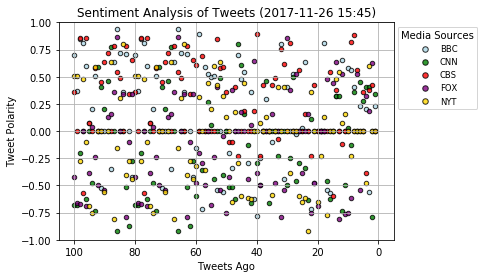

In [19]:
# Build the scatter plots for each city types


plt.scatter(BBC_tweetcount,
            BBC_compound,
            s=20, c="lightblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")

plt.scatter(CNN_tweetcount, 
            CNN_compound, 
            s=20, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(CBS_tweetcount, 
            CBS_compound, 
            s=20, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(FOX_tweetcount, 
            FOX_compound, 
            s=20, c="purple", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="FOX")


plt.scatter(NYT_tweetcount, 
            NYT_compound, 
            s=20, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="NYT")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((105,-5))
plt.ylim((-1,1))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title ="Media Sources", 
                  labelspacing=0.5, bbox_to_anchor=(1, 1))

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]


# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Media.png")

# Show plot
plt.show()

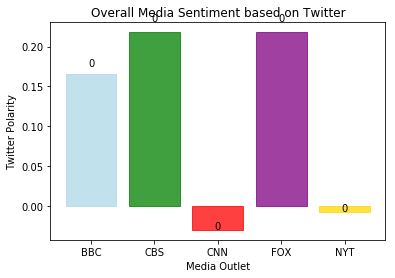

In [20]:
media_group =["BBC","CBS","CNN","FOX","NYT"]
compound = [0.165,0.218,-0.030,0.218,-0.008]

plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("Media Outlet")
plt.ylabel("Twitter Polarity")

#plt.xlim(-0.25, len(gyms))
#plt.ylim(0, max(members) + 5)
#overall_sentiment.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
barlist = plt.bar(media_group, compound,alpha=0.75, align="center")
barlist[0].set_color('lightblue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
barlist[4].set_color('gold')

def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in barlist:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(barlist)


#plt.xticks(tick_locations, gyms)
plt.show()